In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

% matplotlib inline

In [15]:
fname = "210326//210326_Bi2Te3_p5_temp_coeff_test_vac_1.txt"
df = pd.read_csv(fname, sep = ",", header = 0)
#Rref = 3 #ohms
df.head()

,Date_Time,RTDl,RTDr,Rsamp
0,2021-03-26 11:35:56.770409,1098.71946,1098.99292,2.739863
1,2021-03-26 11:35:57.337442,1098.71954,1098.99233,2.739737
2,2021-03-26 11:35:57.904474,1098.72094,1098.99314,2.739982
3,2021-03-26 11:35:58.477507,1098.71566,1098.99196,2.739930
4,2021-03-26 11:35:59.043539,1098.71863,1098.99233,2.740360


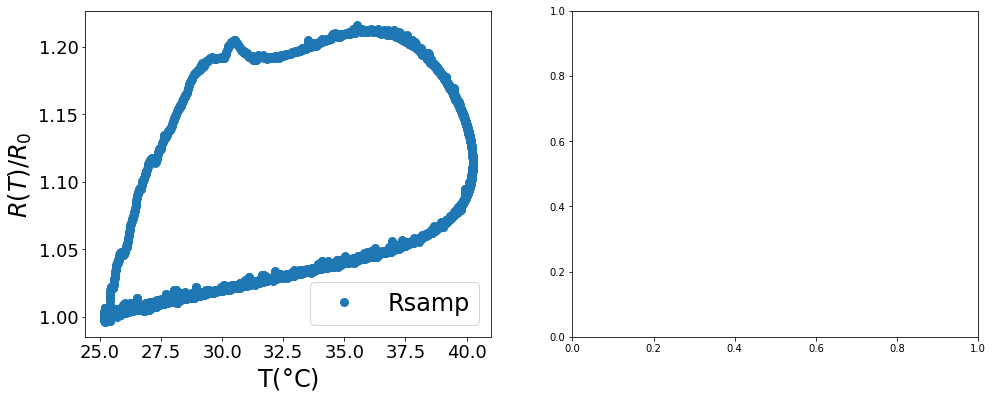

In [8]:
fig, axs = plt.subplots(1,2, figsize = (16,6))
fz = 24 #fontsize
# ylim = [1, 1.08]
x = df['Tavg']
y = df['Rsamp'] / df['Rsamp'].iloc[0]
axs[0].plot(x, y, marker = 'o', markersize = 8, ls = " ")
axs[0].set_xlabel(r'T($\degree$C)', fontsize = fz)
axs[0].set_ylabel(r'$R(T) / R_0$', fontsize = fz)
axs[0].legend(fontsize = fz)
axs[0].tick_params(labelsize=18)

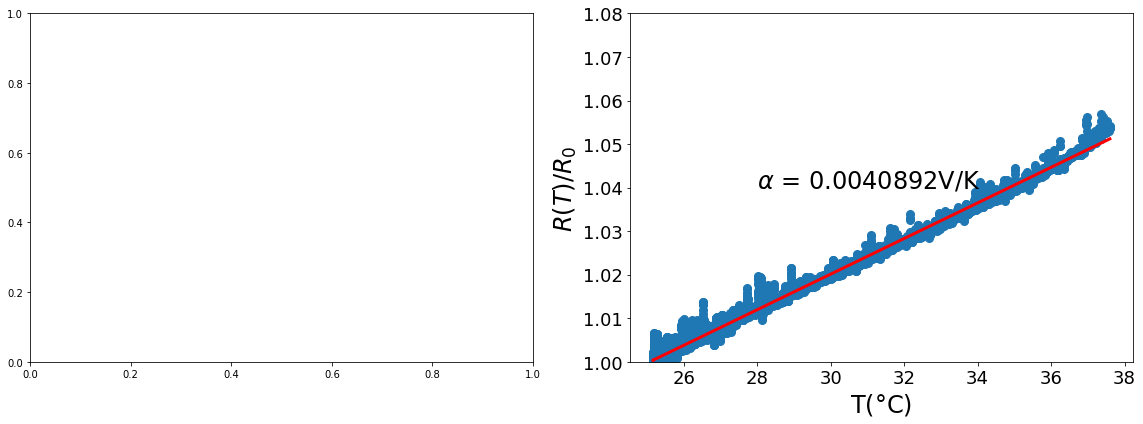

In [17]:
df['Tl'] = 9.91684E-6 * df['RTDl']**2 + 0.23605 * df['RTDl'] - 245.96823
df['Tr'] = 9.91684E-6 * df['RTDr']**2 + 0.23605 * df['RTDr'] - 245.96823
df['Tavg'] = (df['Tl'] + df['Tr']) / 2
#df['Rsamp'] = df['Vsamp'] / df['Vref'] * Rref

fig, axs = plt.subplots(1,2, figsize = (16,6))
# fz = 24 #fontsize
# ylim = [1, 1.08]
# mask = df['Rsamp'].idxmax()
# #heating
# x = df['Tavg'][0 : mask]
# y = df['Rsamp'][0 : mask] / df['Rsamp'].iloc[0]
# m1, b1 = np.polyfit(x, y, 1)
# axs[0].plot(x, y, marker = 'o', markersize = 8, ls = " ", label = 'Heating')
# axs[0].plot(x, np.polyval([m1,b1], x), color = 'red', linewidth = 3)
# axs[0].text(30, 1.02, rf'$\alpha$ = {round(m1,7)}V/K', fontsize = fz)
# axs[0].set_xlabel(r'T($\degree$C)', fontsize = fz)
# axs[0].set_ylabel(r'$R(T) / R_0$', fontsize = fz)
# axs[0].set_ylim(ylim)
# axs[0].legend(fontsize = fz)
# axs[0].tick_params(labelsize=18)

#mask = np.where(df['Tavg'] > 37.9 & df['Tavg'] < 38.0)
mask = 3446
#cooling
x = df['Tavg'][mask:]  - df['Tavg'].iloc[0]
y = df['Rsamp'][mask:] / df['Rsamp'].iloc[0]
m2, b2 = np.polyfit(x, y, 1)
axs[1].plot(df['Tavg'][mask:], y, marker = 'o', markersize = 8, ls = " ", label = 'Cooling')
axs[1].plot(df['Tavg'][mask:], np.polyval([m2,b2], x), color = 'red', linewidth = 3)
axs[1].text(28, 1.04, rf'$\alpha$ = {round(m2,7)}V/K', fontsize = fz)
axs[1].set_xlabel(r'T($\degree$C)', fontsize = fz)
axs[1].set_ylabel(r'$R(T) / R_0$', fontsize = fz)
#axs[1].legend(fontsize = fz)
axs[1].tick_params(labelsize=18)
axs[1].set_ylim(ylim)
plt.tight_layout()

#fig.savefig(fname[:-4] + "_analysis.jpg", dpi = 100)

In [9]:
mask = np.where((df['Tavg'] > 37.5) & (df['Tavg'] < 37.6))
mask

(array([1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165,
        1166, 1167, 1168, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453,
        3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464,
        3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475,
        3476, 3477, 3478, 3479], dtype=int64),)

In [10]:
for i in range(1, len(mask[0]), 1):
    if (mask[0][i] - mask[0][i - 1]) > 10:
        print(mask[0][i])
        break

3446


1
